<a href="https://colab.research.google.com/github/Amtallanekesa/Data-Science-and-Machine-Learning-projects/blob/main/Boston_assignment_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import dependencies

In [ ]:

import pandas as pd
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

defining some helper funcctions

In [ ]:
def timer(f):
    start=time.time()
    res=f()
    end=time.time()
    print("fitting: {}".format(end-start))
    return res
def build_model_for_data(data, target):
    pipeline=make_pipeline(LinearRegression())
    model=timer(lambda: pipeline.fit(x_train,y_train))
    return(x_test,y_test,model)



importing the dataset


In [ ]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Transform the dataset into a dataframe.

data=independent variables/x values

feature_names=column names

target=price of the houses/y values

In [ ]:
df_x=pd.DataFrame(boston.data,columns=boston.feature_names)
df_y=pd.DataFrame(boston.target)

Get some statistics from the dataset

In [ ]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Initialize the linear regression model

In [ ]:
reg =LinearRegression()

split the data into 70% training and 30% testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.30,random_state=40)

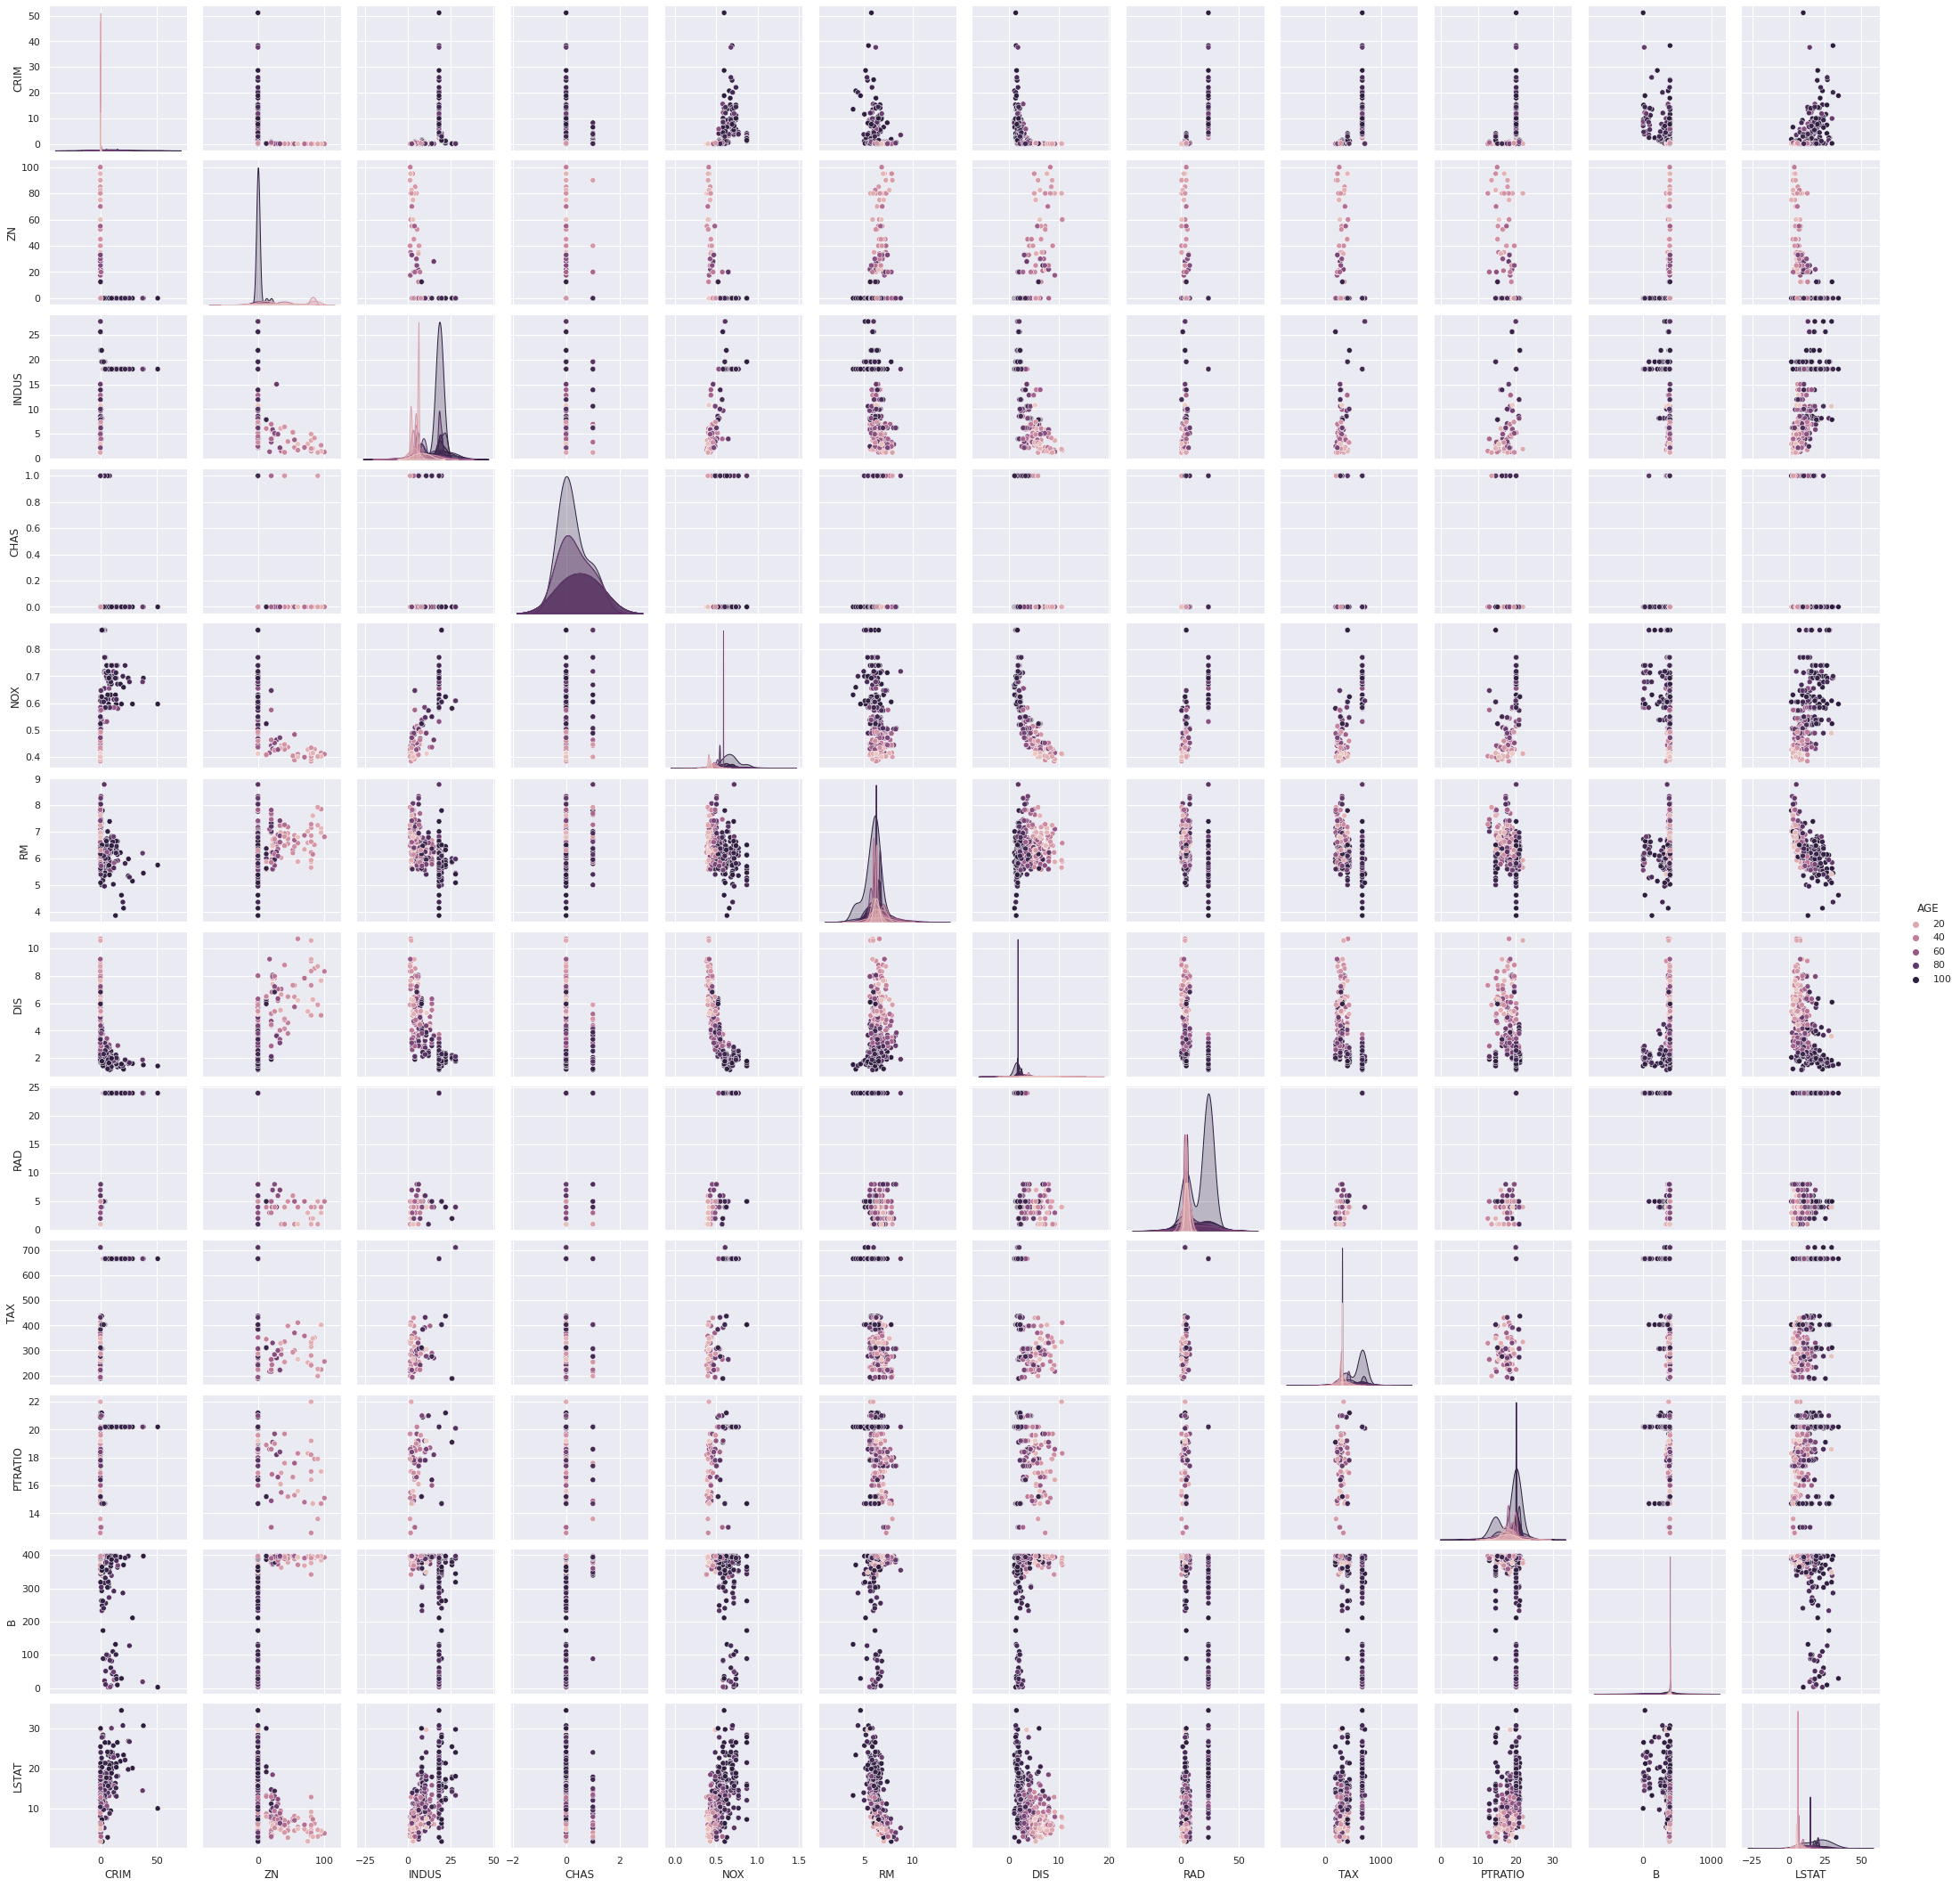

In [ ]:
sns.pairplot(x_train,hue = 'AGE')

In [ ]:
print()
print()
print("Example value distribution of features: ")
for x in boston['data'][0]:
  print(x)



Example value distribution of features: 
0.00632
18.0
2.31
0.0
0.538
6.575
65.2
4.09
1.0
296.0
15.3
396.9
4.98


Do some min-max rescaling

In [ ]:
preprocessor1=MinMaxScaler()
boston_min_max=min_max.fit_transform(boston["data"])
print()
print("Value distribution after min max:")
for x in boston_min_max[0]:
    print(x)


Value distribution after min max:
0.0
0.18
0.06781524926686218
0.0
0.31481481481481477
0.5775052692086607
0.6416065911431514
0.26920313906646415
0.0
0.20801526717557245
0.2872340425531916
0.9999999999999999
0.08967991169977926


In [ ]:
preprocessor2=StandardScaler()
boston_std=std.fit_transform(boston["data"])
print("Value distribution after std:")
for x in boston_std[0]:
    print(x)

Value distribution after std:
-0.4197819386460084
0.2848298609673567
-1.2879094989577484
-0.2725985670699254
-0.14421743255530006
0.4136718893017465
-0.1200134161980508
0.1402136034929299
-0.9828428567665046
-0.6666082090210975
-1.4590003802772087
0.44105193260704206
-1.075562304567866


train the model with my training data

In [ ]:
regModel=make_pipeline(preprocessor1,preprocessor2,LinearRegression)

In [ ]:
model=reg.fit(x_train, y_train)

In [ ]:
print()
print("Without:")
x_test,y_test,model=build_model_for_data(boston["data"],boston["target"])
y_pred=model.predict(x_test)
print("MSE: {}".format(mean_squared_error(y_test,y_pred)))


Without:
fitting: 0.00504755973815918
MSE: 31.82963115555786


In [ ]:
print()
print("MinMax:")
x_test,y_test,model=build_model_for_data(boston_min_max,boston["target"])
y_pred=model.predict(x_test)
print("MSE: {}",format(mean_squared_error(y_test,y_pred)))


MinMax:
fitting: 0.006180763244628906
MSE: {} 31.82963115555786


In [ ]:
print()
print("std:")
x_test,y_test,model=build_model_for_data(boston_std,boston["target"])
y_pred=model.predict(x_test)
print("MSE: {}",format(mean_squared_error(y_test,y_pred)) )


std:
fitting: 0.004192352294921875
MSE: {} 31.82963115555786


Print the predictions on our test data

In [ ]:
y_pred=reg.predict(x_test)
print(y_pred)

[[21.90897572]
 [32.36829283]
 [ 9.38919345]
 [16.40673353]
 [17.80964232]
 [31.83838312]
 [25.10363218]
 [15.4942598 ]
 [21.82825591]
 [-3.63190569]
 [26.12960431]
 [15.57300292]
 [ 5.61225053]
 [ 5.58756072]
 [25.41154332]
 [34.70503462]
 [26.17912943]
 [19.13532445]
 [23.91967422]
 [14.91252997]
 [39.53465438]
 [11.07641307]
 [36.58914352]
 [26.00446715]
 [38.64469005]
 [25.17973575]
 [21.75528189]
 [18.96547913]
 [18.27571802]
 [18.60093947]
 [24.62357132]
 [23.66620392]
 [29.6987949 ]
 [24.08585329]
 [ 0.50581275]
 [24.63764742]
 [25.21913509]
 [12.19902726]
 [39.4812705 ]
 [32.23454473]
 [23.75474746]
 [ 7.056712  ]
 [20.39810217]
 [21.0026853 ]
 [31.32729178]
 [ 7.46193071]
 [12.70824342]
 [31.32832609]
 [22.40993904]
 [35.817382  ]
 [12.81513925]
 [20.71658302]
 [18.48252207]
 [ 7.65314991]
 [ 6.48378445]
 [40.45412148]
 [24.95009747]
 [24.17943728]
 [23.04271387]
 [ 7.56345617]
 [22.86100568]
 [ 9.73479018]
 [32.957889  ]
 [14.06778493]
 [28.52717573]
 [17.20171167]
 [ 3.61911

check the actual values

In [ ]:
print(y_test)

        0
358  22.7
197  30.3
48   14.4
450  13.4
469  20.1
..    ...
212  22.4
133  18.4
279  35.1
274  32.4
23   14.5

[152 rows x 1 columns]


plot training data, test data and prediction line against actual test data

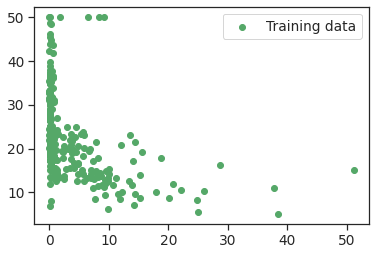

In [ ]:
plt.scatter(x_train.iloc[:,0],y_train, label='Training data', color='g')
plt.legend()
plt.show()

In [ ]:
plt.scatter(x_test.iloc[:,0],y_test, label='test data',color='r')
plt.legend()
plt.show()

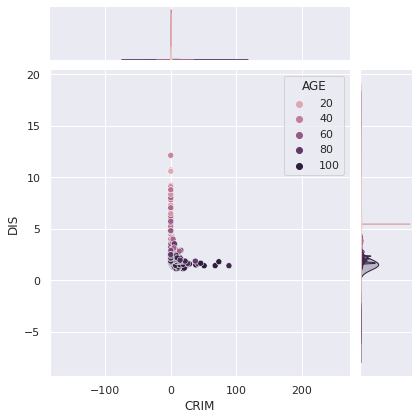

In [ ]:
sns.jointplot(data=df_x,x="CRIM",y="DIS",hue="AGE")

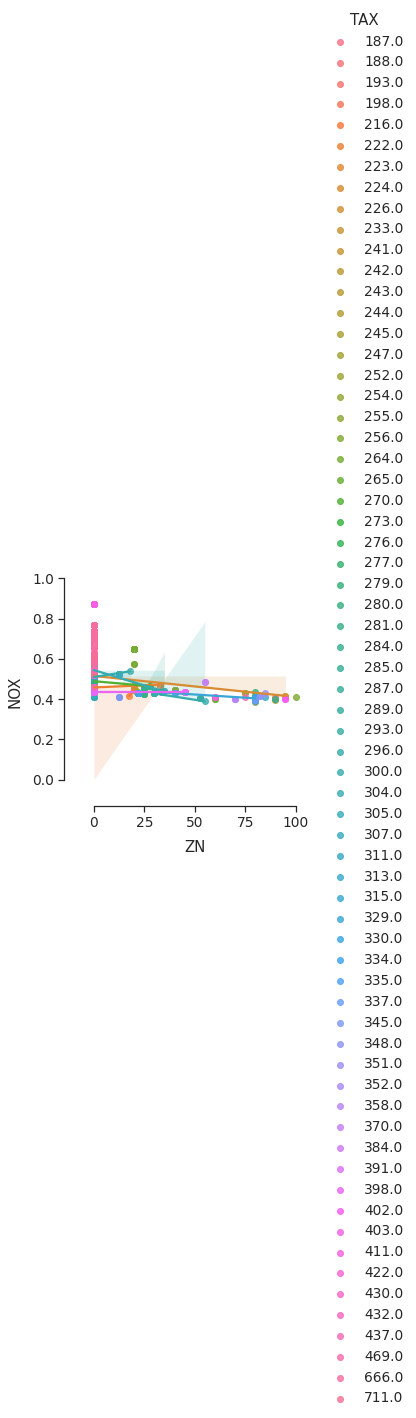

In [ ]:
sns.set_theme(style="ticks", font_scale=1.25)
g=sns.lmplot(data=df_x,x="ZN",y="NOX",hue="TAX")
g.set_axis_labels("ZN","NOX",labelpad=10)
g.legend.set_title("TAX")
g.figure.set_size_inches(6.0,4.0)
g.ax.margins(.15)
g.despine(trim=True)

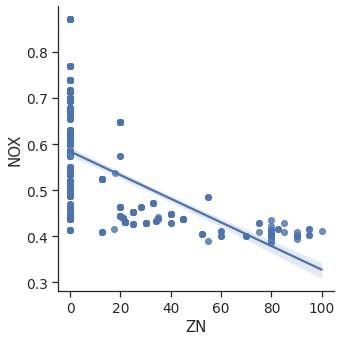

In [ ]:
sns.lmplot(data=df_x,x="ZN",y="NOX")